In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score 

In [3]:
df=pd.read_csv(r"C:\Users\Impana\OneDrive\Documents\day3\diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df=pd.read_csv(r"C:\Users\Impana\OneDrive\Documents\day3\diabetes.csv")
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

In [7]:
df[df.duplicated]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [8]:
df.groupby('Outcome').mean() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [10]:
df.Pregnancies.mean() 

np.float64(3.8450520833333335)

In [11]:
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [12]:
x=df.drop({'Age','Outcome'},axis=1)
y=df.Outcome
print(f'x = {x.shape},y = {y.shape}')

x = (768, 7),y = (768,)


In [15]:
x=df.drop(columns='Outcome', axis=1)
y=df['Outcome']
print(f'x = {x.shape},y = {y.shape}')

x = (768, 8),y = (768,)


In [18]:
dumb="anchal"
print("who is dumb? ",dumb)

who is dumb?  anchal


In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8, stratify=y, random_state=2)
print(x.shape,x_train.shape,x_test.shape)

(768, 8) (614, 8) (154, 8)


In [24]:
classifier=svm.SVC(kernel='linear')

In [25]:
classifier.fit(x_train, y_train)

SVC(kernel='linear')

In [ ]:
y_train_prediction=classifier.predict(x_train)
training_data_accuracy=accuracy_score(y_train_prediction,y_train)
print('Accuracy score of the train data: ', training_data_accuracy)

Accuracy score of the test data:  0.7833876221498371


In [31]:
from sklearn.metrics import confusion_matrix ,accuracy_score,precision_score,f1_score,recall_score,roc_auc_score,roc_curve
from sklearn.metrics import classification_report 

In [32]:
y_train_prediction=classifier.predict(x_train)
test_data_accuracy=accuracy_score(y_train_prediction,y_train)
print('Accuracy score of the test data: ', test_data_accuracy)

Accuracy score of the test data:  0.7833876221498371


Text(0.5, 1.0, 'Confusion Matrix- svm Classifier ')

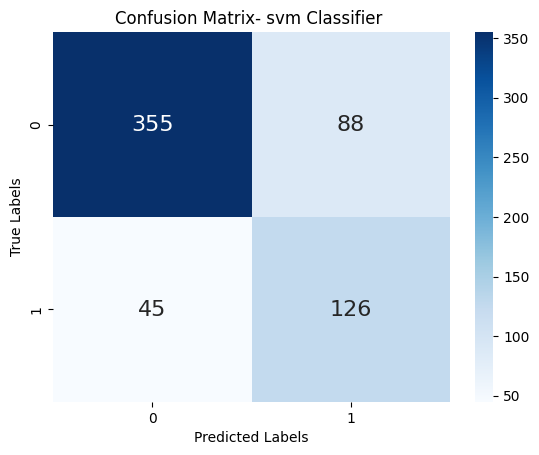

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
cm_train=confusion_matrix(y_train_prediction, y_train)
plt.figure()
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', annot_kws={'size': 16})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix- svm Classifier ')